## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_merged_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

#Check for NaN
#mouse_merged_df.isnull().sum()

# Display the data table for preview
mouse_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#rename columns for ease of use
mouse_merged_df = mouse_merged_df.rename(columns={"Mouse ID": "mouse_id", "Drug Regimen": "drug_regimen", "Sex" : "sex", 
                                         "Age_months" : "age_months", "Weight (g)" : "weight", "Timepoint" : "timepoint",
                                         "Tumor Volume (mm3)" : "tumor_vol", "Metastatic Sites" : "meta_sites"})
mouse_merged_df.head(20)

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice.
nmice = mouse_merged_df["mouse_id"].nunique()
print(nmice)

249


In [7]:
#Find mice with duplicate timepoints
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_merged_df[mouse_merged_df.duplicated(["mouse_id", "timepoint"], keep = False)] 
duplicate

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned_df = mouse_merged_df.set_index("mouse_id")
mouse_cleaned_df = mouse_cleaned_df.drop(["g989"])
mouse_cleaned_df = mouse_cleaned_df.reset_index()
mouse_cleaned_df

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
nmice2 = mouse_cleaned_df["mouse_id"].nunique()
print(nmice2)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_cleaned_df.head()
drug_groups = mouse_cleaned_df.groupby("drug_regimen")
type(drug_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = pd.DataFrame(drug_groups["tumor_vol"].mean())
tumor_vol_median = pd.DataFrame(drug_groups["tumor_vol"].median())
tumor_vol_var = pd.DataFrame(drug_groups["tumor_vol"].var())
tumor_vol_std = pd.DataFrame(drug_groups["tumor_vol"].std())
tumor_vol_sem = pd.DataFrame(drug_groups["tumor_vol"].sem())

In [12]:
# Assemble the resulting series into a single summary dataframe.
summary_df = tumor_vol_mean.merge(tumor_vol_median, on = "drug_regimen", suffixes = ("_mean", "_median"))
summary_df = summary_df.merge(tumor_vol_var, on = 'drug_regimen')
summary_df = summary_df.merge(tumor_vol_std, on = "drug_regimen", suffixes = ("_var", "_std_dev"))
summary_df = summary_df.merge(tumor_vol_sem, on = "drug_regimen")
summary_df = summary_df.rename(columns = {"tumor_vol_mean" : "Mean of Tumor Volume (mm3)",
                                          "tumor_vol_median" : "Median of Tumor Volume (mm3)",
                                          "tumor_vol_var" : "Variance of Tumor Volume",
                                          "tumor_vol_std_dev" : "Standard Deviation of Tumor Volume",
                                          "tumor_vol" : "Standard of the Mean of Tumor Volume"})
summary_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard of the Mean of Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = mouse_cleaned_df.groupby(mouse_cleaned_df["drug_regimen"]).tumor_vol.agg(["mean", "median", "var", "std", 
                                               "sem"]) 
summary_agg_df

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

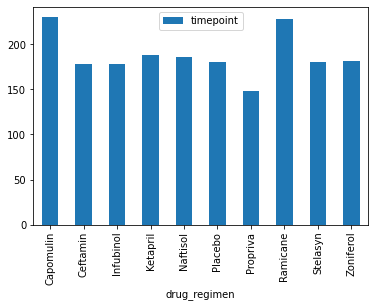

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = pd.DataFrame(drug_groups["timepoint"].count().reset_index())
ax = measurements_df.plot.bar(x='drug_regimen', y='timepoint', rot=90)

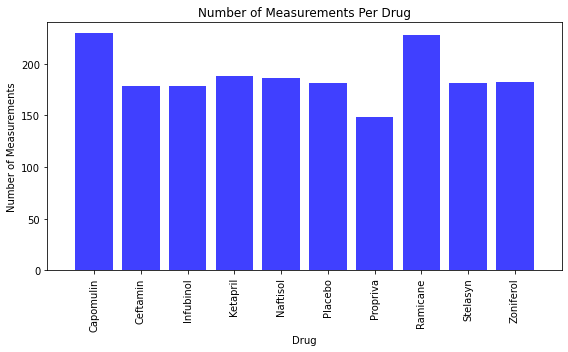

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_df = pd.DataFrame(drug_groups["timepoint"].count().reset_index())
x_axis = np.arange(len(measurements_df))
tick_locations = [value for value in x_axis]
timepts = list(measurements_df["timepoint"])
#print(timepts)
plt.figure(figsize=(8,5))
plt.bar(x_axis, timepts, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, measurements_df["drug_regimen"], rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(measurements_df["timepoint"])+10)
plt.title("Number of Measurements Per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

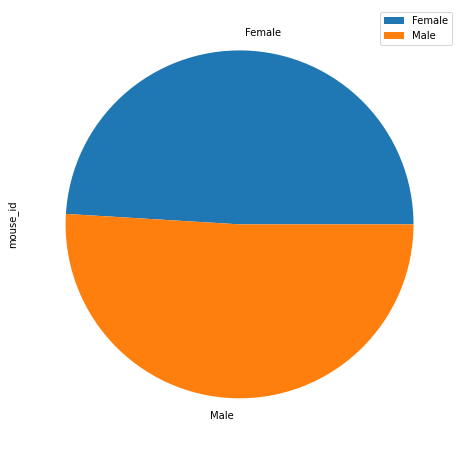

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame(mouse_cleaned_df.groupby("sex").count())
sex_df
plot = sex_df.plot.pie(y='mouse_id', figsize=(8, 8))

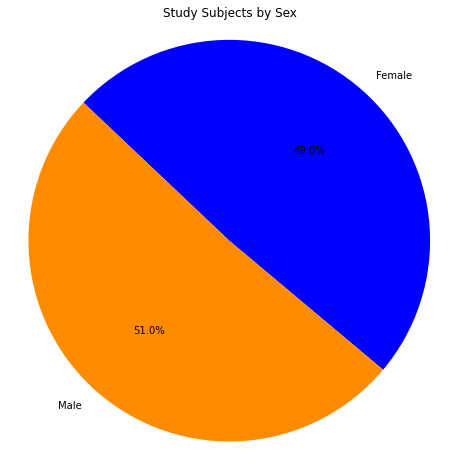

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = pd.DataFrame(mouse_cleaned_df.groupby("sex").count())
sex_df = sex_df.reset_index()
sex_df
sizes = sex_df.loc[:, "mouse_id"]
#print(sizes)
labels = ["Female", "Male"]
colors = ["blue", "darkorange"]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels = labels, colors = colors, startangle = 320, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Study Subjects by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_data_df = pd.DataFrame(mouse_cleaned_df.groupby(["drug_regimen", "mouse_id"]).max())
tumor_data_df = tumor_data_df.reset_index()
tumor_data_df = tumor_data_df.loc[(tumor_data_df['drug_regimen'] == "Capomulin") | (tumor_data_df['drug_regimen'] == "Ceftamin") |
                                  (tumor_data_df['drug_regimen'] == "Infubinol") | (tumor_data_df['drug_regimen'] == "Ramicane")]
tumor_data_df.head()

,drug_regimen,mouse_id,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,Capomulin,b128,Female,9,22,45,45.651331,2
1,Capomulin,b742,Male,7,21,45,45.000000,0
2,Capomulin,f966,Male,16,17,20,45.000000,0
3,Capomulin,g288,Male,3,19,45,46.304003,1
4,Capomulin,g316,Female,22,22,45,46.809225,2


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint ??
tumor_volume_df = pd.merge(tumor_data_df, mouse_cleaned_df, how="inner", on = ["mouse_id", "timepoint"])
tumor_volume_df = tumor_volume_df[["drug_regimen_x", "mouse_id", "sex_x", "age_months_x", "weight_y", "timepoint", 
                                  "tumor_vol_y", "meta_sites_y"]]
tumor_volume_df = tumor_volume_df.rename(columns = {"drug_regimen_x" : "drug_regimen",
                                          "sex_x" : "sex",
                                          "age_months_x" : "age_months",
                                          "weight_y" : "weight",
                                          "tumor_vol_y" : "tumor_vol",
                                          "meta_sites_y" : "meta_sites"})
tumor_volume_df.head()

,drug_regimen,mouse_id,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,Capomulin,b128,Female,9,22,45,38.982878,2
1,Capomulin,b742,Male,7,21,45,38.939633,0
2,Capomulin,f966,Male,16,17,20,30.485985,0
3,Capomulin,g288,Male,3,19,45,37.074024,1
4,Capomulin,g316,Female,22,22,45,40.159220,2


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_regimen = tumor_volume_df.groupby("drug_regimen")
capomulin_df = pd.DataFrame(drug_regimen.get_group("Capomulin"))
#capomulin_df.head()
cap_tumor_vol = list(capomulin_df["tumor_vol"])
cap_tumor_vol.sort()
print(cap_tumor_vol)

[23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]


In [21]:
capomulin_mean = capomulin_df["tumor_vol"].mean()
capomulin_lower = capomulin_df["tumor_vol"].quantile(q=0.25)
capomulin_upper = capomulin_df["tumor_vol"].quantile(q=0.75)
capomulin_iqr = capomulin_upper - capomulin_lower
cap_lower_b = capomulin_lower - (capomulin_iqr * 1.5)
cap_upper_b = (capomulin_iqr * 1.5) + capomulin_upper
cap_outlier = capomulin_df.loc[(capomulin_df["tumor_vol"] > cap_upper_b) | (capomulin_df["tumor_vol"] < cap_lower_b)]
print(capomulin_lower)
print(capomulin_mean)
print(capomulin_upper)
print(capomulin_iqr)
print(cap_lower_b)
print(cap_upper_b)
print(cap_outlier)

32.37735684
36.6675677192
40.1592203
7.781863460000004
20.70456164999999
51.83201549
Empty DataFrame
Columns: [drug_regimen, mouse_id, sex, age_months, weight, timepoint, tumor_vol, meta_sites]
Index: []


In [22]:
ceftamin_df = pd.DataFrame(drug_regimen.get_group("Ceftamin"))
#ceftamin_df.head()
cef_tumor_vol = list(ceftamin_df["tumor_vol"])
cef_tumor_vol.sort()
print(cef_tumor_vol)

[45.0, 45.0, 45.0, 45.0, 46.78453491, 47.784681799999994, 48.72207785, 52.92534846, 55.74282869, 56.05774909, 57.91838132, 59.74190064, 59.85195552, 61.38666032, 61.43389223, 61.84902336, 62.99935619, 64.19234114, 64.29983003, 64.63494887, 64.72983655, 67.52748237, 67.74866174, 68.59474498, 68.92318457]


In [23]:
ceftamin_mean = ceftamin_df["tumor_vol"].mean()
ceftamin_lower = ceftamin_df["tumor_vol"].quantile(q=0.25)
ceftamin_upper = ceftamin_df["tumor_vol"].quantile(q=0.75)
ceftamin_iqr = ceftamin_upper - ceftamin_lower
cef_lower_b = ceftamin_lower - (ceftamin_iqr * 1.5)
cef_upper_b = (ceftamin_iqr * 1.5) + ceftamin_upper
cef_outlier = ceftamin_df.loc[(ceftamin_df["tumor_vol"] > cef_upper_b) | (ceftamin_df["tumor_vol"] < cef_lower_b)]
print(ceftamin_lower)
print(ceftamin_mean)
print(ceftamin_upper)
print(ceftamin_iqr)
print(cef_lower_b)
print(cef_upper_b)
print(cef_outlier)

48.72207785
57.7539768252
64.29983003
15.577752179999997
25.355449580000002
87.66645829999999
Empty DataFrame
Columns: [drug_regimen, mouse_id, sex, age_months, weight, timepoint, tumor_vol, meta_sites]
Index: []


In [24]:
infubinol_df = pd.DataFrame(drug_regimen.get_group("Infubinol"))
#infubinol_df.head()
inf_tumor_vol = list(infubinol_df["tumor_vol"])
inf_tumor_vol.sort()
print(inf_tumor_vol)

[36.321345799999996, 45.69933088, 46.25011212, 47.01036401, 50.00513807, 51.54243058, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 57.03186187, 58.26844248, 60.16518046, 60.91876652, 60.96971133, 62.11727887, 62.43540402, 62.75445141, 65.52574285, 66.08306589, 66.19691151, 67.28962147, 67.68556862, 67.97341878, 72.2267309]


In [25]:
infubinol_mean = infubinol_df["tumor_vol"].mean()
infubinol_lower = infubinol_df["tumor_vol"].quantile(q=0.25)
infubinol_upper = infubinol_df["tumor_vol"].quantile(q=0.75)
infubinol_iqr = infubinol_upper - infubinol_lower
inf_lower_b = infubinol_lower - (infubinol_iqr * 1.5)
inf_upper_b = (infubinol_iqr * 1.5) + infubinol_upper
inf_outlier = infubinol_df.loc[(infubinol_df["tumor_vol"] > inf_upper_b) | (infubinol_df["tumor_vol"] < inf_lower_b)]
print(infubinol_lower)
print(infubinol_mean)
print(infubinol_upper)
print(infubinol_iqr)
print(inf_lower_b)
print(inf_upper_b)
print(inf_outlier)

54.04860769
58.1782457852
65.52574285
11.477135160000003
36.83290494999999
82.74144559000001
   drug_regimen mouse_id     sex  age_months  weight  timepoint  tumor_vol  \
55    Infubinol     c326  Female          18      25          5  36.321346   

    meta_sites  
55           0  


In [26]:
ramicane_df = pd.DataFrame(drug_regimen.get_group("Ramicane"))
#ramicane_df.head()
ram_tumor_vol = list(ramicane_df["tumor_vol"])
ram_tumor_vol.sort()
print(ram_tumor_vol)

[22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 36.56165229, 37.22565033, 37.31123552, 38.34200823, 38.407618299999996, 38.81036633, 40.65900627, 40.66771292, 43.04754260000001, 43.16637266, 43.41938077, 44.18345092, 45.22086888]


In [27]:
ramicane_mean = ramicane_df["tumor_vol"].mean()
ramicane_lower = ramicane_df["tumor_vol"].quantile(q=0.25)
ramicane_upper = ramicane_df["tumor_vol"].quantile(q=0.75)
ramicane_iqr = ramicane_upper - ramicane_lower
ram_lower_b = ramicane_lower - (ramicane_iqr * 1.5)
ram_upper_b = (ramicane_iqr * 1.5) + ramicane_upper
ram_outlier = ramicane_df.loc[(ramicane_df["tumor_vol"] > ram_upper_b) | (ramicane_df["tumor_vol"] < ram_lower_b)]
print(ramicane_lower)
print(ramicane_mean)
print(ramicane_upper)
print(ramicane_iqr)
print(ram_lower_b)
print(ram_upper_b)
print(ram_outlier)

31.56046955
36.1913904284
40.65900627
9.098536719999998
17.912664470000003
54.30681135
Empty DataFrame
Columns: [drug_regimen, mouse_id, sex, age_months, weight, timepoint, tumor_vol, meta_sites]
Index: []


In [28]:
# Put treatments into a list
drug_list = list((tumor_volume_df["drug_regimen"]).unique())
print(drug_list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [29]:
tumor_comparison = list(zip(cap_tumor_vol, cef_tumor_vol, inf_tumor_vol, ram_tumor_vol))
print(tumor_comparison)

[(23.34359787, 45.0, 36.321345799999996, 22.05012627), (28.43096411, 45.0, 45.69933088, 29.12847181), (28.48403281, 45.0, 46.25011212, 30.27623175), (30.48598484, 45.0, 47.01036401, 30.56462509), (31.02392294, 46.78453491, 50.00513807, 30.63869575), (31.896238399999998, 47.784681799999994, 51.54243058, 31.09533505), (32.37735684, 48.72207785, 54.04860769, 31.56046955), (33.32909778, 52.92534846, 54.65654872, 32.97852192), (34.45529799, 55.74282869, 55.62942846, 33.39765251), (36.04104736, 56.05774909, 55.65068132, 33.56240217), (37.07402422, 57.91838132, 57.03186187, 36.13485243), (37.31184577, 59.74190064, 58.26844248, 36.37451039), (38.125164399999996, 59.85195552, 60.16518046, 36.56165229), (38.75326548, 61.38666032, 60.91876652, 37.22565033), (38.84687569, 61.43389223, 60.96971133, 37.31123552), (38.93963263, 61.84902336, 62.11727887, 38.34200823), (38.98287774, 62.99935619, 62.43540402, 38.407618299999996), (39.95234669, 64.19234114, 62.75445141, 38.81036633), (40.1592203, 64.2998

In [30]:
tumor_data_df = pd.DataFrame(tumor_comparison, columns = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
tumor_data_df.head()

,Capomulin,Ceftamin,Infubinol,Ramicane
0,23.343598,45.000000,36.321346,22.050126
1,28.430964,45.000000,45.699331,29.128472
2,28.484033,45.000000,46.250112,30.276232
3,30.485985,45.000000,47.010364,30.564625
4,31.023923,46.784535,50.005138,30.638696


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c44972b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c44979b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c4486f60>,
 'medians': [<matplotlib.lines.Line2D at 0x1f8c44a00f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c44a0470>,
 'means': []}

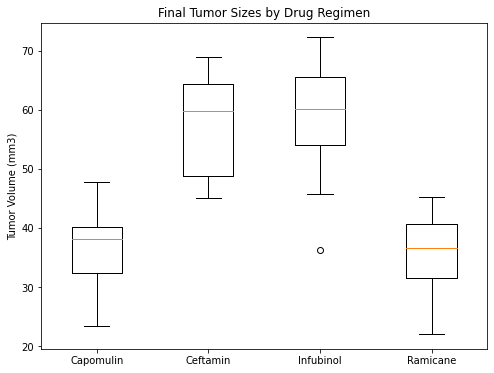

In [31]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = tumor_data_df["Capomulin"], tumor_data_df["Ceftamin"], tumor_data_df["Infubinol"], tumor_data_df["Ramicane"]
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Final Tumor Sizes by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(data, labels = labels)

## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128 = mouse_cleaned_df.loc[mouse_cleaned_df["mouse_id"] == "b128"]
b128

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [44]:
x_axis = np.arange(0, 50, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [45]:
b128_vol = list(b128["tumor_vol"])
print(b128_vol)

[45.0, 45.65133131, 43.2708519, 43.78489343, 42.731552, 43.26214483, 40.60533486, 37.96764437, 38.3797259, 38.98287774]


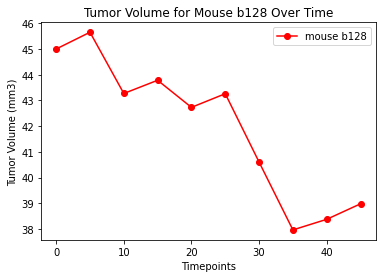

In [54]:
#draw plot
plt.plot(x_axis, b128_vol, marker = "o", color="red", label = "mouse b128")
#plt.plot(figsize = (7,5))??
plt.title("Tumor Volume for Mouse b128 Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = pd.DataFrame(mouse_cleaned_df.groupby(["drug_regimen", "mouse_id"]).mean().reset_index())
cap_df = cap_df.loc[cap_df["drug_regimen"] == "Capomulin"]
cap_df.head()

,drug_regimen,mouse_id,age_months,weight,timepoint,tumor_vol,meta_sites
0,Capomulin,b128,9.0,22.0,22.5,41.963636,0.7
1,Capomulin,b742,7.0,21.0,22.5,40.083699,0.0
2,Capomulin,f966,16.0,17.0,10.0,36.505973,0.0
3,Capomulin,g288,3.0,19.0,22.5,41.990097,0.8
4,Capomulin,g316,22.0,22.0,22.5,44.613344,1.0


In [67]:
x_axis = list(cap_df["weight"])
#x_axis

In [68]:
y_values = list(cap_df["tumor_vol"])
#y_values

Text(0.5, 1.0, 'Tumor Volume by Mouse Weight')

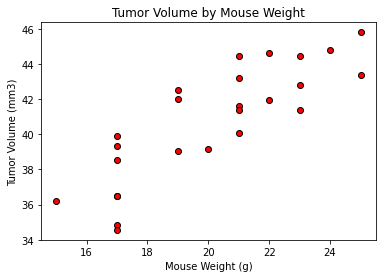

In [72]:
plt.scatter(x_axis, y_values, marker = "o", facecolors = "red", edgecolors = "black", s=None, alpha = 1)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Mouse Weight")

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
